Installing Libraries

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import statistics as sts
import pickle


Uploading Data

In [342]:
dfnyc = pd.read_excel('ourhomenyc.xlsx')
df = pd.read_csv('teste_indicium_precificacao.csv')

df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [343]:
df.sort_values('price', ascending=False).head(100)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
9150,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
29237,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
12341,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
40432,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30258,23372850,SHOOTS ONLY - Eclectic Artist Loft in Williams...,11844979,V,Brooklyn,Williamsburg,40.71846,-73.96160,Entire home/apt,2000,1,0,NaN,NaN,4,177
7476,5578843,Private cozy Bedroom in Brooklyn,26098783,Sam,Brooklyn,Sunset Park,40.65137,-74.00666,Private room,2000,40,28,2015-12-06,0.54,2,0
495,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
1479,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,2016-01-28,0.71,11,364


Associating datasets

In [344]:
# Dataset found on OURHOME.NYC, from a census containing numerous social indicators that may be important for the rent price of an apartment depending on its borough
dfnyc.head()

,StreetName,Borough,Zip,FullAddress,CommunityDistrict,LOT,NeighborhoodTabulationCode,NeighborhoodTabulationName,PUMA,USALEEP Life Expectancy at Birth (years),...,Employer-Provided Health Insurance (% of total population),Multiple Health Insurers (% of total population),Public Health Insurance (% of total population),No Health Insurance (% of total population),American Human Development Index (Tract),Physical Needs Assesment,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,SEWARD AVENUE,Bronx,10473.0,1690 GAR SEWARD AVENUE Bronx 10473,9.0,1,BX09,Soundview-Castle Hill-Clason Point-Harding Park,3709.0,80.9,...,34.318220,23.654271,32.093734,8.609272,4.028502,3.368164e+08,NaN,NaN,NaN,NaN
1,EAST 135TH STREET,Bronx,10454.0,585 EAST 135TH STREET Bronx 10454,1.0,1,BX39,Mott Haven-Port Morris,3710.0,NaN,...,28.058321,8.926031,42.532006,17.211949,NaN,2.951520e+08,NaN,NaN,NaN,NaN
2,SEWARD AVENUE,Bronx,10473.0,1710 SEWARD AVENUE Bronx 10473,9.0,1,BX09,Soundview-Castle Hill-Clason Point-Harding Park,3709.0,80.3,...,16.350958,23.459617,50.645296,8.711490,4.011999,3.368164e+08,NaN,NaN,NaN,NaN
3,SEWARD AVENUE,Bronx,10473.0,1669 SEWARD AVENUE Bronx 10473,9.0,1,BX09,Soundview-Castle Hill-Clason Point-Harding Park,3709.0,80.3,...,16.350958,23.459617,50.645296,8.711490,4.011999,1.437293e+08,NaN,NaN,NaN,NaN
4,SEWARD AVENUE,Bronx,10473.0,1704 SEWARD AVENUE Bronx 10473,9.0,1,BX09,Soundview-Castle Hill-Clason Point-Harding Park,3709.0,80.3,...,16.350958,23.459617,50.645296,8.711490,4.011999,3.368164e+08,NaN,NaN,NaN,NaN


Treating data

In [345]:
# Removing unfilled columns and disposable statistics (Removing absolut data when it has the relative one (I will use the mean of each borough))
dfnyc.pop('Unnamed: 74')
dfnyc.pop('Unnamed: 75')
dfnyc.pop('Unnamed: 76')
dfnyc.pop('Unnamed: 77')
dfnyc.pop('StreetName')
dfnyc.pop('FullAddress')
dfnyc.pop('NeighborhoodTabulationName')
dfnyc.pop('NeighborhoodTabulationCode')
dfnyc.pop('Zip')
dfnyc.pop('CommunityDistrict')
dfnyc.pop('LOT')
dfnyc.pop('PUMA')
dfnyc.pop('Poverty (# of individuals in households with incomes below poverty)')
dfnyc.pop('Total Population (#)')
dfnyc['Borough'] = dfnyc['Borough'].astype('string')
dfnyc



,Borough,USALEEP Life Expectancy at Birth (years),Adult Stability (% of adults living in same house 1 year ago),"Industry Category: Arts, Entertainment, Recreation, Accommodation and Food Services (% of all employed)",Completed at Least Bachelor's Degree (% of adults 25+),Completed at Least High School (% of adults 25+),Child Stability (% of children in same house 1 year ago),Child Health Plus or Medicaid (% of children under 18),Commute 60 Minutes Or More One Way (% of workers),Completed Bachelor's Degree (% of adults 25+),...,Employed Workers with Income Below Poverty Level (%),Living Alone (% of households),Nonfamily Households (% of households),"Private Health Insurance, Directly Purchased (% of total population)",Employer-Provided Health Insurance (% of total population),Multiple Health Insurers (% of total population),Public Health Insurance (% of total population),No Health Insurance (% of total population),American Human Development Index (Tract),Physical Needs Assesment
0,Bronx,80.9,97.106481,5.283019,12.850269,68.383810,93.314286,37.291667,26.177491,7.529012,...,11.933962,24.617737,24.617737,1.324503,34.318220,23.654271,32.093734,8.609272,4.028502,3.368164e+08
1,Bronx,NaN,80.931587,8.449612,22.863364,76.320087,85.362517,63.164721,29.445351,15.514426,...,13.875969,38.596491,48.916409,3.271693,28.058321,8.926031,42.532006,17.211949,NaN,2.951520e+08
2,Bronx,80.3,97.063186,12.379354,11.969112,59.512110,97.014925,74.958375,28.322718,9.090909,...,19.806966,29.180221,29.700716,0.832639,16.350958,23.459617,50.645296,8.711490,4.011999,3.368164e+08
3,Bronx,80.3,97.063186,12.379354,11.969112,59.512110,97.014925,74.958375,28.322718,9.090909,...,19.806966,29.180221,29.700716,0.832639,16.350958,23.459617,50.645296,8.711490,4.011999,1.437293e+08
4,Bronx,80.3,97.063186,12.379354,11.969112,59.512110,97.014925,74.958375,28.322718,9.090909,...,19.806966,29.180221,29.700716,0.832639,16.350958,23.459617,50.645296,8.711490,4.011999,3.368164e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742,Staten Island,76.8,95.741483,5.417277,14.336075,65.628672,93.927126,60.662252,30.600293,10.987074,...,11.566618,27.719962,27.719962,0.000000,29.777128,12.787724,48.447205,8.987943,3.614556,2.180693e+08
5743,Staten Island,76.8,95.741483,5.417277,14.336075,65.628672,93.927126,60.662252,30.600293,10.987074,...,11.566618,27.719962,27.719962,0.000000,29.777128,12.787724,48.447205,8.987943,3.614556,2.180693e+08
5744,Staten Island,76.8,95.741483,5.417277,14.336075,65.628672,93.927126,60.662252,30.600293,10.987074,...,11.566618,27.719962,27.719962,0.000000,29.777128,12.787724,48.447205,8.987943,3.614556,2.180693e+08
5745,Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.642239e+08


In [346]:
# Verifying for divergences between datasets, tried to join by district, but the extra dataset hadn't enough data
diff = list(set(df['bairro_group']) - set(dfnyc['Borough']))
diff

[]

In [347]:
#grouping statistics for each borough, as mentioned before, because the OURHOME dataset didn't contain some districts
dfnyc = dfnyc.groupby('Borough').mean()
dfnyc = dfnyc.reset_index()
dfnyc.head()


,Borough,USALEEP Life Expectancy at Birth (years),Adult Stability (% of adults living in same house 1 year ago),"Industry Category: Arts, Entertainment, Recreation, Accommodation and Food Services (% of all employed)",Completed at Least Bachelor's Degree (% of adults 25+),Completed at Least High School (% of adults 25+),Child Stability (% of children in same house 1 year ago),Child Health Plus or Medicaid (% of children under 18),Commute 60 Minutes Or More One Way (% of workers),Completed Bachelor's Degree (% of adults 25+),...,Employed Workers with Income Below Poverty Level (%),Living Alone (% of households),Nonfamily Households (% of households),"Private Health Insurance, Directly Purchased (% of total population)",Employer-Provided Health Insurance (% of total population),Multiple Health Insurers (% of total population),Public Health Insurance (% of total population),No Health Insurance (% of total population),American Human Development Index (Tract),Physical Needs Assesment
0,Bronx,75.961571,93.416081,10.754711,12.974085,65.625165,93.642072,65.839041,37.027999,9.404013,...,15.883017,30.988155,33.807200,2.631614,22.035352,19.369901,46.741946,9.221186,3.063456,2.350270e+08
1,Brooklyn,75.359415,91.481397,9.370479,17.070901,70.818637,93.894051,64.945475,30.273058,12.257227,...,16.458059,34.159053,39.981935,3.388624,24.484474,17.285688,46.088280,8.752934,3.226578,2.553638e+08
2,Manhattan,78.378819,90.059026,12.939887,32.057246,74.872633,92.486536,54.959269,15.548967,18.663645,...,12.827590,41.084639,47.367982,4.493936,33.808993,17.405100,36.534170,7.757801,4.639736,2.354154e+08
3,Queens,77.175811,91.981526,11.416865,17.784402,74.852614,91.784678,55.169584,33.207942,12.572987,...,10.716533,27.781371,30.478014,3.926932,29.380817,16.254107,41.256081,9.182063,3.570932,3.759992e+08
4,Staten Island,76.273054,95.626257,6.612756,21.372827,74.090792,96.637708,59.615942,29.625011,14.097137,...,14.887724,31.066596,33.184443,2.215032,31.649590,13.709372,44.678973,7.747033,3.859391,1.551559e+08


Merging data

In [348]:
df = df.rename(columns={'bairro_group': 'Borough'})
df

,id,nome,host_id,host_name,Borough,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [349]:
#Merging the OURHOME dataset data to our main dataset
data = pd.merge(df, dfnyc, on='Borough')

In [350]:
#checking the data types to correct objects ti reduce memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 79 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   id                                                                                                              48894 non-null  int64  
 1   nome                                                                                                            48878 non-null  object 
 2   host_id                                                                                                         48894 non-null  int64  
 3   host_name                                                                                                       48873 non-null  object 
 4   Borough                                 

In [351]:
data.select_dtypes(include='object')

,nome,host_name,Borough,bairro,room_type,ultima_review
0,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
1,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
2,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
3,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19
4,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,Entire home/apt,2019-06-22
...,...,...,...,...,...,...
48889,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,NaN
48890,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,Private room,NaN
48891,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,NaN
48892,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,Shared room,NaN


In [352]:
df['nome'] = df['nome'].astype('string')
df['host_name'] = df['host_name'].astype('string')
df['Borough'] = df['Borough'].astype('string')
df['bairro'] = df['bairro'].astype('string')


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  string 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  string 
 4   Borough                        48894 non-null  string 
 5   bairro                         48894 non-null  string 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [353]:
set(df['room_type'])

{'Entire home/apt', 'Private room', 'Shared room'}

In [354]:
#Adapting the room type from categorical to numerical features

df['room_type'] = df['room_type'].replace(['Entire home/apt', 'Private room', 'Shared room'], [3, 2, 1])
df['room_type'].astype(int)




C:\Users\joaop\AppData\Local\Temp\ipykernel_16308\4003112703.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['room_type'] = df['room_type'].replace(['Entire home/apt', 'Private room', 'Shared room'], [3, 2, 1])


0        3
1        2
2        3
3        3
4        3
        ..
48889    2
48890    2
48891    3
48892    1
48893    2
Name: room_type, Length: 48894, dtype: int32

In [355]:
#Adapting the reviews columns to a better format

#(numero_de_reviews, ultima_review, reviews_por_mes)

#Convert the ultima_review(last_review) to the time passed since the last review
df['ultima_review'] = pd.to_datetime(df['ultima_review'])
df['ultima_review'].max()

Timestamp('2019-07-08 00:00:00')

In [356]:

today = pd.to_datetime('2019-07-09')

df['last_review'] = (today - df['ultima_review']).dt.days
df['last_review'].fillna(-1, inplace=True)
df.pop('ultima_review')


C:\Users\joaop\AppData\Local\Temp\ipykernel_16308\4246037151.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_review'].fillna(-1, inplace=True)


0       2019-05-21
1              NaT
2       2019-07-05
3       2018-11-19
4       2019-06-22
           ...    
48889          NaT
48890          NaT
48891          NaT
48892          NaT
48893          NaT
Name: ultima_review, Length: 48894, dtype: datetime64[ns]

In [357]:
df['last_review']

df['reviews_por_mes']=df['reviews_por_mes'].fillna('0')
df['reviews_por_mes'] = df['reviews_por_mes'].astype(int)

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  string 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  string 
 4   Borough                        48894 non-null  string 
 5   bairro                         48894 non-null  string 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  int64  
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  reviews_por_mes                48894 non-null 

TRAINING AND TESTING!!!


In [359]:
#Removing unrelated columns
df.pop('nome')
df.pop('id')
df.pop('host_id')
df.pop('host_name')
df.pop('bairro')




0                   Midtown
1                    Harlem
2              Clinton Hill
3               East Harlem
4               Murray Hill
                ...        
48889    Bedford-Stuyvesant
48890              Bushwick
48891                Harlem
48892        Hell's Kitchen
48893        Hell's Kitchen
Name: bairro, Length: 48894, dtype: string

In [360]:
df['price'].describe()

count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'price')

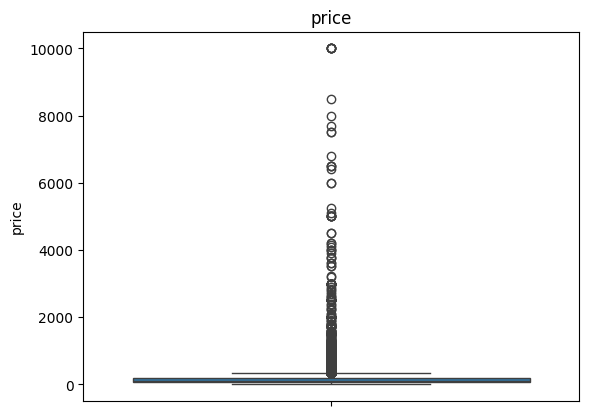

In [361]:
#remoção de outliers
sns.boxplot(df['price']).set_title("price")

In [362]:
# 1. Calcular a média dos valores para cada bairro
media_por_bairro = df.groupby('Borough')['price'].mean()

# 2. Identificar outliers (por exemplo, valores mais de 3 desvios padrão acima da média)
desvio_padrao_por_bairro = df.groupby('Borough')['price'].std()
limite_superior = media_por_bairro + 3 * desvio_padrao_por_bairro

# 3. Substituir outliers pela média dos valores correspondentes ao bairro
for bairro, media in media_por_bairro.items():
    valores_bairro = df.loc[df['Borough'] == bairro, 'price']
    outliers = valores_bairro > limite_superior[bairro]
    df.loc[df['Borough'] == bairro, 'price'] = df.loc[df['Borough'] == bairro, 'price'].where(~outliers, media)

df['price'].describe()

C:\Users\joaop\AppData\Local\Temp\ipykernel_16308\1379228440.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 40.  45.  90. ... 125.  70. 100.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Borough'] == bairro, 'price'] = df.loc[df['Borough'] == bairro, 'price'].where(~outliers, media)


count    48894.000000
mean       139.994179
std        112.337786
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       1066.000000
Name: price, dtype: float64

In [363]:
lista = mediana_por_bairro.to_list
lista

<bound method IndexOpsMixin.tolist of Borough
Bronx             65.0
Brooklyn          90.0
Manhattan        150.0
Queens            75.0
Staten Island     75.0
Name: price, dtype: float64>

<Axes: xlabel='latitude', ylabel='longitude'>

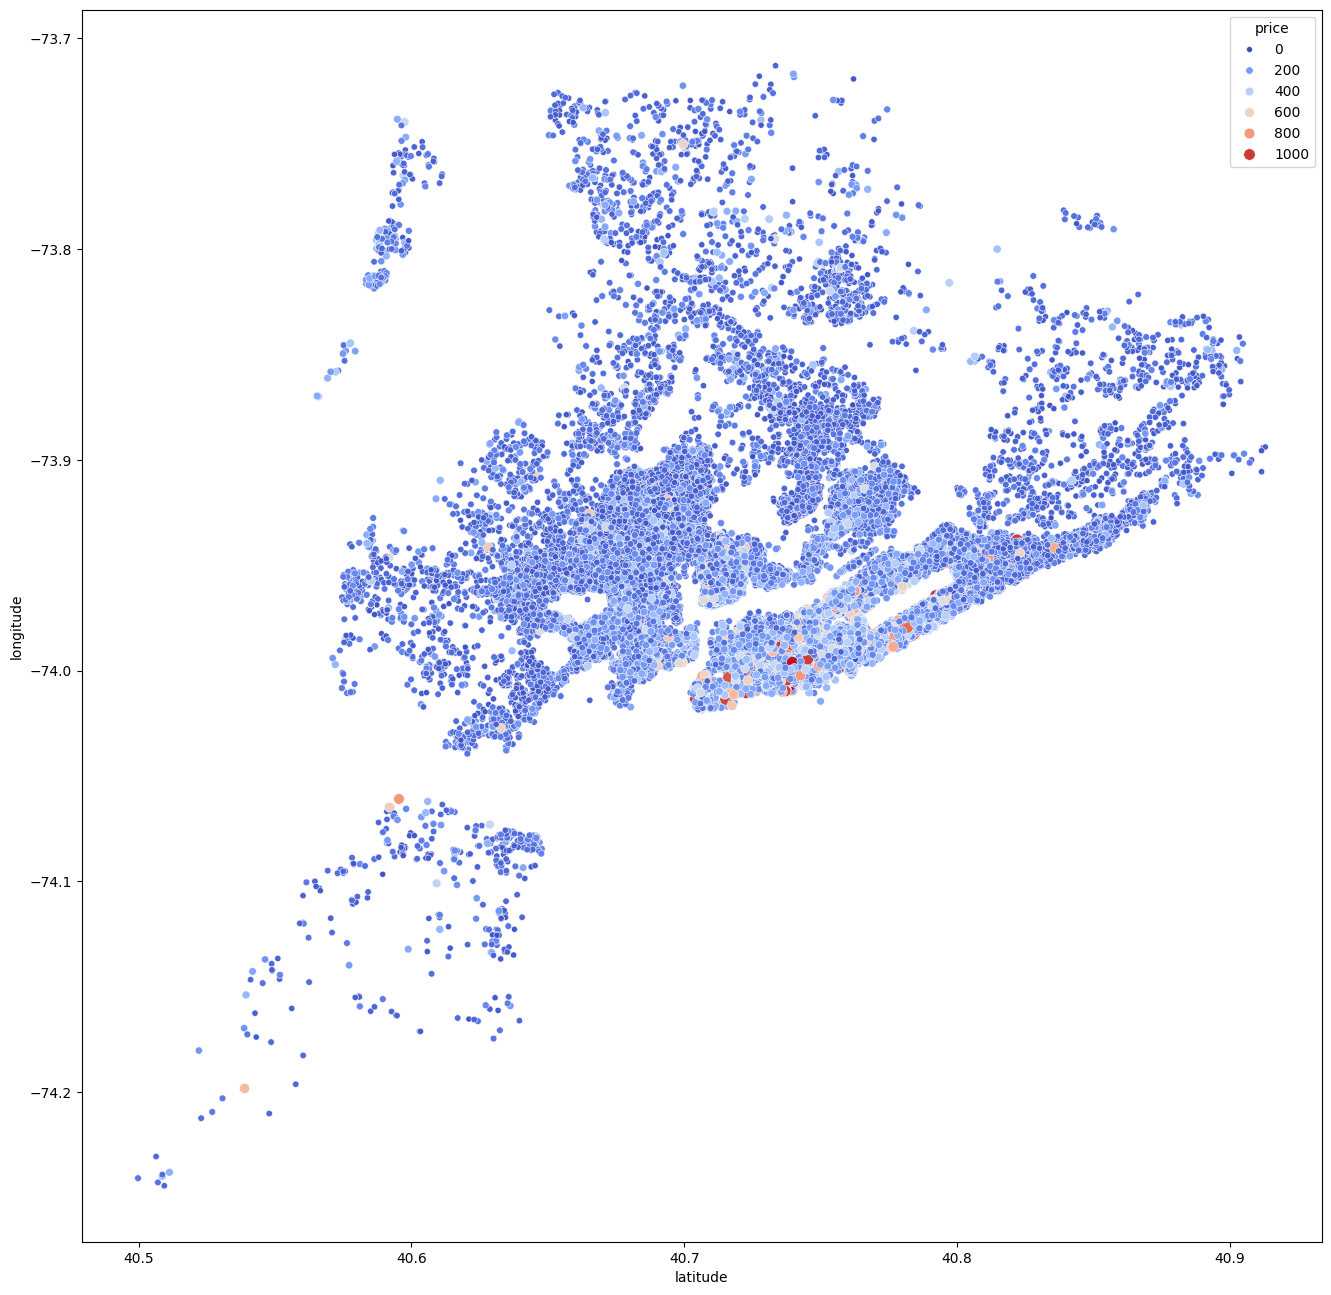

In [364]:
plt.figure(figsize=(16,16))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='price', palette='coolwarm', size='price' )

In [365]:
df['Bairro'] = df['Borough'].replace(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], ['65', '90', '150', '75', '75'])

df['Bairro'] = df['Bairro'].astype(int)


array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'room_type'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimo_noites'}>,
        <Axes: title={'center': 'numero_de_reviews'}>],
       [<Axes: title={'center': 'reviews_por_mes'}>,
        <Axes: title={'center': 'calculado_host_listings_count'}>,
        <Axes: title={'center': 'disponibilidade_365'}>],
       [<Axes: title={'center': 'last_review'}>,
        <Axes: title={'center': 'Bairro'}>, <Axes: >]], dtype=object)

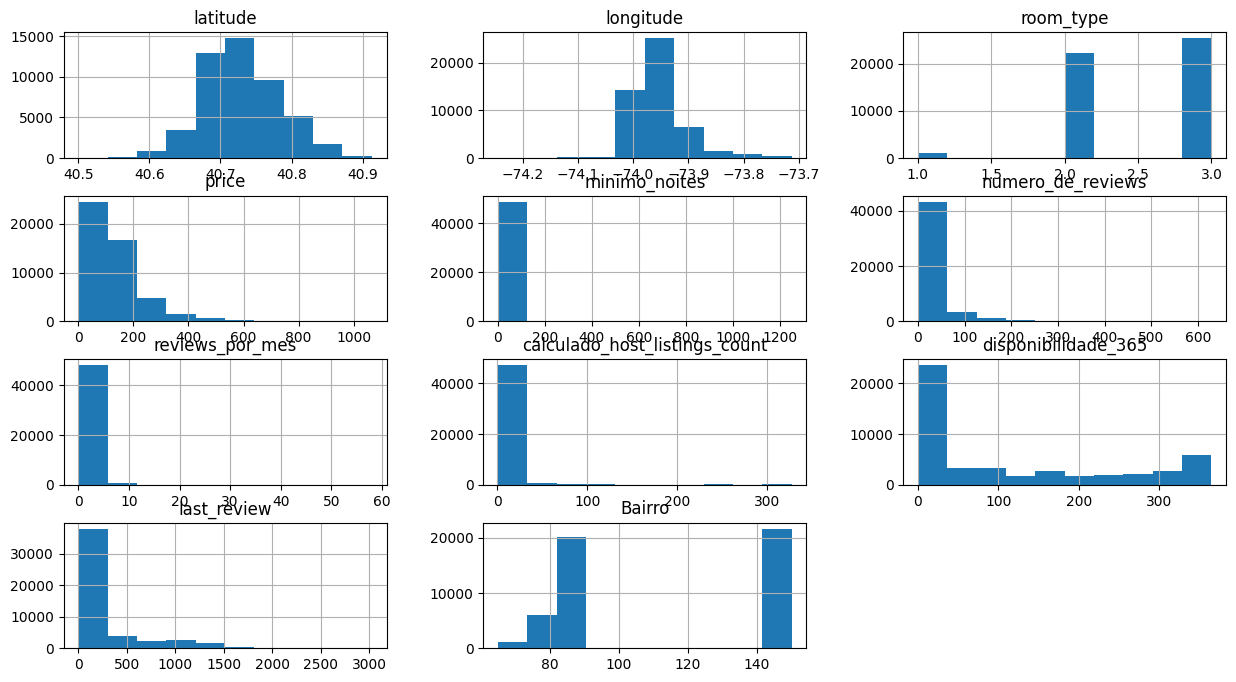

In [366]:
df.hist(figsize= (15, 8))

In [367]:
from sklearn.model_selection import train_test_split

X = df.drop(['price', 'Borough'], axis=1)
y = df['price']

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [369]:
dftrain = X_train.join(y_train)

In [370]:
dftrain

,latitude,longitude,room_type,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,last_review,Bairro,price
30953,40.70226,-73.92895,2,1,0,0,1,0,-1.0,90,55.0
30737,40.71179,-73.99848,2,2,129,8,1,3,3.0,150,160.0
26199,40.68350,-73.95700,3,2,51,2,1,10,29.0,90,130.0
5422,40.77595,-73.97966,3,7,26,0,1,85,47.0,150,225.0
39125,40.83658,-73.94088,3,7,2,0,1,0,80.0,150,55.0
...,...,...,...,...,...,...,...,...,...,...,...
40045,40.76577,-73.87131,2,1,56,9,5,89,6.0,75,35.0
491,40.80827,-73.95329,1,3,168,4,1,248,3.0,150,49.0
44462,40.67428,-73.97559,3,3,4,2,1,130,14.0,90,150.0
5523,40.80655,-73.94854,3,1,0,0,1,0,-1.0,150,275.0


<Axes: >

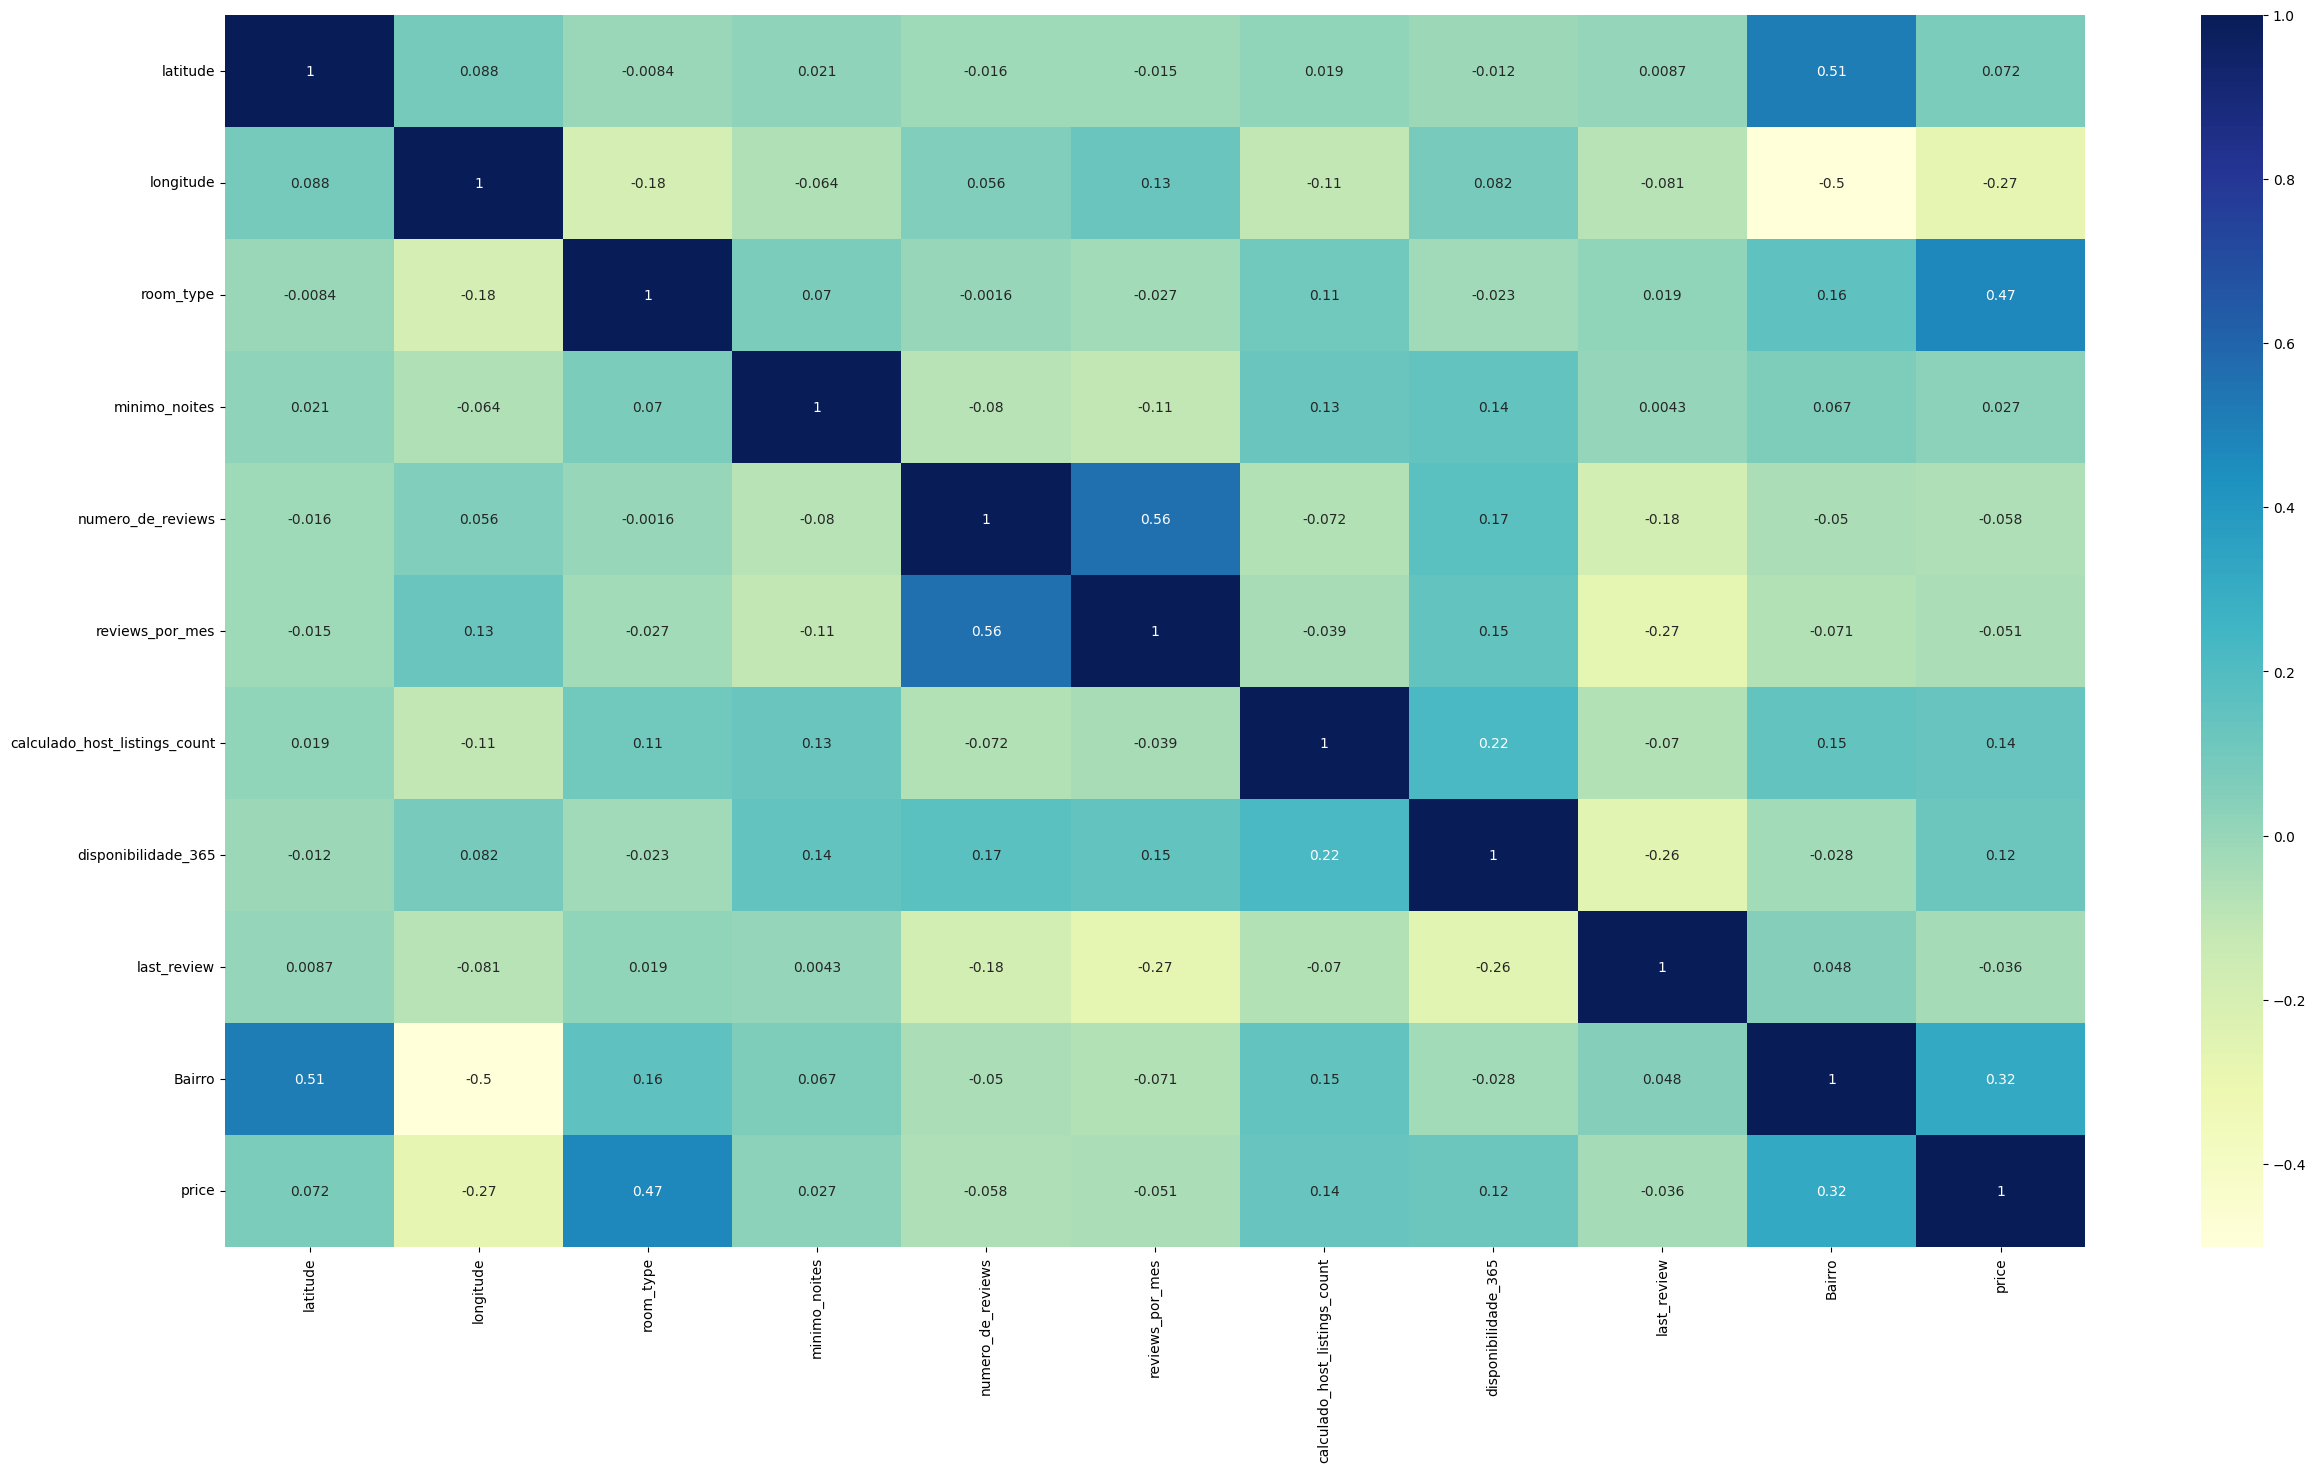

In [371]:
plt.figure(figsize=(30, 16))
sns.heatmap(dftrain.corr(), annot=True, cmap='YlGnBu')

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'room_type'}>],
       [<Axes: title={'center': 'minimo_noites'}>,
        <Axes: title={'center': 'numero_de_reviews'}>,
        <Axes: title={'center': 'reviews_por_mes'}>],
       [<Axes: title={'center': 'calculado_host_listings_count'}>,
        <Axes: title={'center': 'disponibilidade_365'}>,
        <Axes: title={'center': 'last_review'}>],
       [<Axes: title={'center': 'Bairro'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

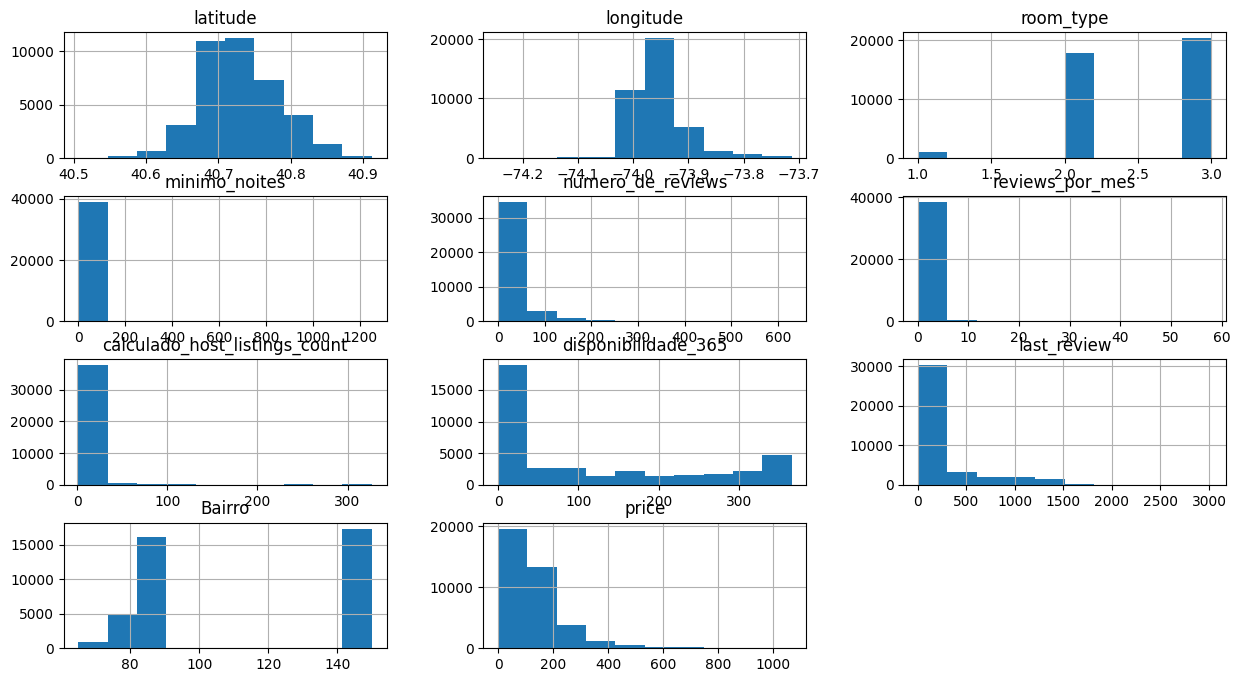

In [372]:
dftrain.hist(figsize=(15, 8))

<Axes: xlabel='latitude', ylabel='longitude'>

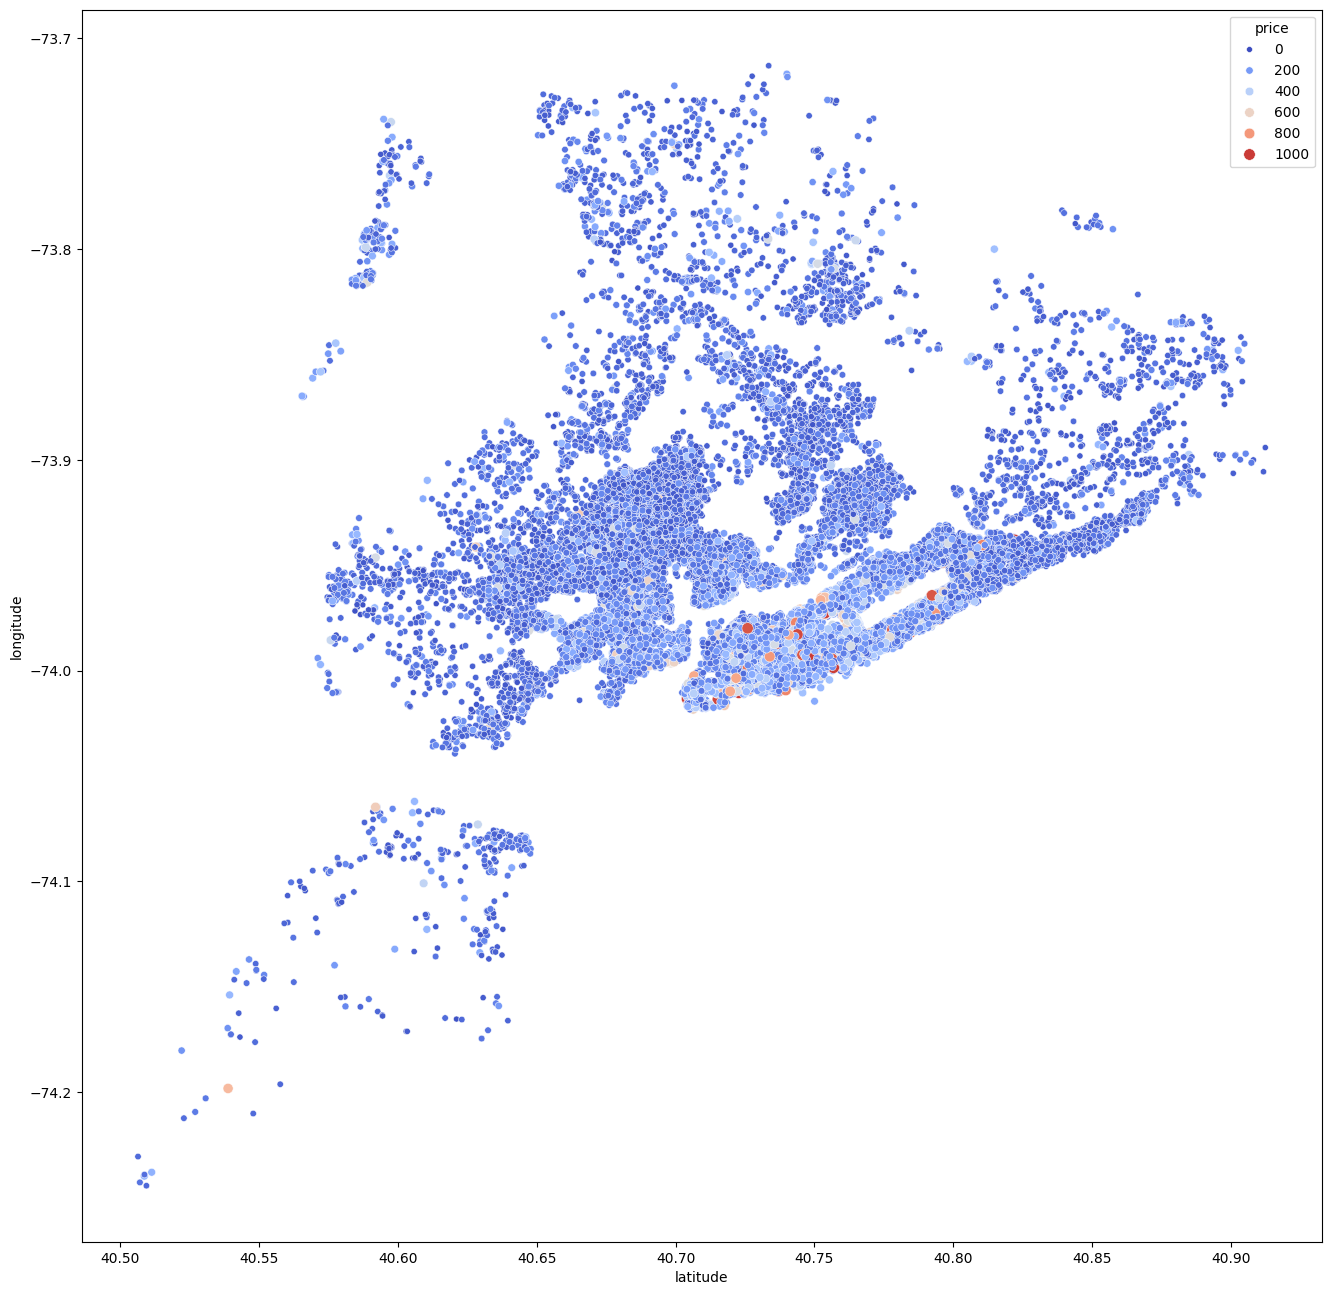

In [373]:
plt.figure(figsize=(16,16))
sns.scatterplot(x='latitude', y='longitude', data=dftrain, hue='price', palette='coolwarm', size='price' )

In [374]:
from sklearn.linear_model import LinearRegression

In [375]:
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [376]:
reg.score(X_test, y_test)
#Ruim

0.3264621700884772

In [377]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [378]:
forest.score(X_test, y_test)
#Menos pior

0.46629056574721284

In [379]:
pickle.dump(forest, open('model.pkl', 'wb'))

TESTANDO MODELO

In [380]:
# Dados do apartamento
dados_apartamento = {'id': [2595],
 'nome': ['Skylit Midtown Castle'],
 'host_id': [2845],
 'host_name': ['Jennifer'],
 'bairro_group': ['Manhattan'],
 'bairro': ['Midtown'],
 'latitude': [40.75362],
 'longitude': [-73.98377],
 'room_type': ['Entire home/apt'],
 'price': [225],
 'minimo_noites': [1],
 'numero_de_reviews': [45],
 'ultima_review': ['2019-05-21'],
 'reviews_por_mes': [0.38],
 'calculado_host_listings_count': [2],
 'disponibilidade_365': [355]}


# Criar DataFrame com os dados do apartamento
df_apartamento = pd.DataFrame(dados_apartamento)

#Converter o 'ultima_review'
df_apartamento['ultima_review'] = pd.to_datetime(df_apartamento['ultima_review'])
df_apartamento['ultima_review'].max()
today = pd.to_datetime('2019-07-09')
df_apartamento['last_review'] = (today - df_apartamento['ultima_review']).dt.days
df_apartamento['last_review'].fillna(-1, inplace=True)
df_apartamento.pop('ultima_review')

df_apartamento['reviews_por_mes']=df_apartamento['reviews_por_mes'].fillna('0')
df_apartamento['reviews_por_mes'] = df_apartamento['reviews_por_mes'].astype(int)

df_apartamento


C:\Users\joaop\AppData\Local\Temp\ipykernel_16308\1196189232.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_apartamento['last_review'].fillna(-1, inplace=True)


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,last_review
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355,49


In [381]:
#Removing unrelated columns
df_apartamento.pop('nome')
df_apartamento.pop('id')
df_apartamento.pop('host_id')
df_apartamento.pop('host_name')
df_apartamento.pop('bairro')

0    Midtown
Name: bairro, dtype: object

In [382]:
df_apartamento = df_apartamento.rename(columns={'bairro_group': 'Borough'})
df_apartamento

,Borough,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,last_review
0,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355,49


In [383]:
df_apartamento['Borough'] = df['Borough'].astype('string')


In [384]:
df_apartamento['Bairro'] = df_apartamento['Borough'].replace(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], ['65', '90', '150', '75', '75'])

df_apartamento['Bairro'] = df_apartamento['Bairro'].astype(int)
df_apartamento.pop('Borough')

0    Manhattan
Name: Borough, dtype: string

In [385]:
set(df_apartamento['room_type'])

{'Entire home/apt'}

In [386]:
#Adapting the room type from categorical to numerical features

df_apartamento['room_type'] = df_apartamento['room_type'].replace(['Entire home/apt', 'Private room', 'Shared room'], [3, 2, 1])
df_apartamento['room_type'].astype(int)

C:\Users\joaop\AppData\Local\Temp\ipykernel_16308\1851339074.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_apartamento['room_type'] = df_apartamento['room_type'].replace(['Entire home/apt', 'Private room', 'Shared room'], [3, 2, 1])


0    3
Name: room_type, dtype: int32

In [387]:
df_apartamento.pop('price')

0    225
Name: price, dtype: int64

In [388]:
# Carregar o modelo treinado
with open('model.pkl', 'rb') as arquivo:
    modelo = pickle.load(arquivo)


# Fazer a previsão do preço do apartamento
preco_previsto = modelo.predict(df_apartamento)

# Exibir o preço previsto
print(f"Sugestão de preço para o apartamento: ${preco_previsto[0]:.2f}")


Sugestão de preço para o apartamento: $226.28
